<h1>Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Loading-and-stadying-data" data-toc-modified-id="Loading-and-stadying-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Loading and stadying data</a></span></li><li><span><a href="#Data-preprocessing" data-toc-modified-id="Data-preprocessing-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data preprocessing</a></span><ul class="toc-item"><li><span><a href="#Merging-tables" data-toc-modified-id="Merging-tables-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Merging tables</a></span></li><li><span><a href="#Correcting-the-style-of-the-column-names" data-toc-modified-id="Correcting-the-style-of-the-column-names-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Correcting the style of the column names</a></span></li><li><span><a href="#Changing-data-types" data-toc-modified-id="Changing-data-types-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Changing data types</a></span></li><li><span><a href="#Filling-in-the-missing-values" data-toc-modified-id="Filling-in-the-missing-values-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Filling in the missing values</a></span></li><li><span><a href="#Adding-features" data-toc-modified-id="Adding-features-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Adding features</a></span></li></ul></li><li><span><a href="#Exploratory-data-analysis" data-toc-modified-id="Exploratory-data-analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exploratory data analysis</a></span><ul class="toc-item"><li><span><a href="#Distribution-of-features-by-target-feature" data-toc-modified-id="Distribution-of-features-by-target-feature-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Distribution of features by target feature</a></span></li><li><span><a href="#Analysis-of-the-duration-of-cooperation" data-toc-modified-id="Analysis-of-the-duration-of-cooperation-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Analysis of the duration of cooperation</a></span></li><li><span><a href="#Analysis-of-the-amount-of-monthly-payments" data-toc-modified-id="Analysis-of-the-amount-of-monthly-payments-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Analysis of the amount of monthly payments</a></span></li><li><span><a href="#Analysis-of-the-dynamics-of-attracting-new-customers" data-toc-modified-id="Analysis-of-the-dynamics-of-attracting-new-customers-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Analysis of the dynamics of attracting new customers</a></span></li><li><span><a href="#Correlation-analysis-between-features" data-toc-modified-id="Correlation-analysis-between-features-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Correlation analysis between features</a></span></li></ul></li><li><span><a href="#Data-preparation" data-toc-modified-id="Data-preparation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data preparation</a></span></li><li><span><a href="#Models-training" data-toc-modified-id="Models-training-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Models training</a></span><ul class="toc-item"><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Logistic Regression</a></span></li><li><span><a href="#Random-Forest-Classifier" data-toc-modified-id="Random-Forest-Classifier-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Random Forest Classifier</a></span></li><li><span><a href="#Catboost" data-toc-modified-id="Catboost-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Catboost</a></span></li><li><span><a href="#LightGBM" data-toc-modified-id="LightGBM-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>LightGBM</a></span></li></ul></li><li><span><a href="#Model-testing" data-toc-modified-id="Model-testing-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Model testing</a></span></li><li><span><a href="#Overall-conclusion" data-toc-modified-id="Overall-conclusion-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Overall conclusion</a></span></li><li><span><a href="#Project-Report" data-toc-modified-id="Project-Report-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Project Report</a></span></li></ul></div>

# Predicting customer churn

Telecom operator wants to learn how to predict customer churn. If it turns out that a user is planning to leave, they will be offered promo codes and special offers. The operator's team has collected personal data on some customers, information about their tariffs and contracts.

**Service description**.

The operator provides two main types of services: 

1. Fixed telephony. It is possible to connect the telephone set to several lines simultaneously.
2. the Internet. There are two types of connection: via telephone line (*DSL, digital subscriber line*) or fiber optic cable (*Fiber optic*).  

Other services are also available:

- Internet security: anti-virus (*DeviceProtection*) and blocking of unsafe sites (*OnlineSecurity*);
- Dedicated technical support line (*TechSupport*);
- Cloud-based file storage for data backup (*OnlineBackup*);
- Streaming TV (*StreamingTV*) and film catalogue (*StreamingMovies*).

Customers can pay for the services every month or sign a 1-2 year contract. Various methods of payment and an electronic cheque facility are available.

**Data description**.

The data consists of files obtained from various sources:

- `contract.csv` - information about the contract;
- `personal.csv` - personal data of the customer;
- `internet.csv` - information about Internet services;
- `phone.csv` - information on telephony services.

In all files `customerID` column contains customer code.

The information about the contracts is up to date as of February 1, 2020.

In [1]:
# importing required libraries and modules

import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import phik
import re
import warnings
warnings.filterwarnings('ignore')

from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler

## Loading and stadying data

The data consists of files obtained from different sources:

- `contract.csv` - contract information;
- `personal.csv` - personal data of the customer;
- `internet.csv` - information about Internet services;
- `phone.csv` - information on telephony services.

Let's read the data of the source files into the corresponding variables.

In [2]:
try:
    contract = pd.read_csv('final_provider/contract.csv')
    personal = pd.read_csv('final_provider/personal.csv')
    internet = pd.read_csv('final_provider/internet.csv')
    phone = pd.read_csv('final_provider/phone.csv')
    
except FileNotFoundError:
    contract = pd.read_csv('/datasets/final_provider/contract.csv')
    personal = pd.read_csv('/datasets/final_provider/personal.csv')
    internet = pd.read_csv('/datasets/final_provider/internet.csv')
    phone = pd.read_csv('/datasets/final_provider/phone.csv')

Get the functions ready for an overview of the data in the source dataframes.

In [3]:
# defining the function for overview the dataframe general info

def overlook(df):
    display(df.sample(10))
    print('-----------------------------------')
    df.info()
    print('\n-----------------------------------\nКоличество и доля пропусков:')
    display(df.isna().agg(['sum', 'mean']))
    print('\n-----------------------------------\nКоличество явных дубликатов:', df.duplicated().sum())
    
# defining the function to overview descriptive statistics and values by dataframe columns

def describe(df):
    display(df.describe(include='all'))
    
    for column in df.columns:
        print(f'-----------------------\nСтолбец: {column}')
        display(df[column].value_counts().sort_index())
    

**>> contract info**

In [4]:
overlook(contract)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
3921,7964-YESJC,2018-02-01,No,Month-to-month,No,Mailed check,66.30,1559.45
4816,5906-DVAPM,2015-07-01,No,One year,Yes,Credit card (automatic),75.00,4213.9
2114,7707-PYBBH,2016-10-01,No,Month-to-month,Yes,Mailed check,61.90,2647.1
455,8313-NDOIA,2018-02-01,No,Month-to-month,Yes,Electronic check,104.15,2494.65
3986,6242-FEGFD,2014-08-01,No,Two year,No,Mailed check,96.60,6424.25
7009,7703-ZEKEF,2017-11-01,2019-10-01 00:00:00,Month-to-month,Yes,Electronic check,81.00,1917.1
1202,3927-NLNRY,2015-07-01,2019-12-01 00:00:00,One year,Yes,Bank transfer (automatic),94.25,4867.95
2848,7508-KBIMB,2018-02-01,No,One year,Yes,Credit card (automatic),56.25,1454.25
3995,0618-XWMSS,2017-09-01,2020-01-01 00:00:00,Month-to-month,Yes,Bank transfer (automatic),74.90,2068.55
6051,4079-ULGFR,2018-10-01,No,Month-to-month,No,Mailed check,20.00,275.7


-----------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB

-----------------------------------
Количество и доля пропусков:


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
sum,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



-----------------------------------
Количество явных дубликатов: 0


The table contains information on the parameters of customer contracts and contains 7,043 records. 

The contract parameters provided are: start and end date, contract type, attribute of paperless (electronic) billing, payment method, monthly and total amount of payment for the services consumed.

The data type in the `BeginDate`, `EndDate` and `TotalCharges` columns will need to be changed to a data type that corresponds to the logic of the data presented in them, i.e. `datetime` for dates and `float` for total charges respectively.

No missing values or explicit duplicates have been detected in the data.

In [5]:
describe(contract)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
count,7043,7043,7043,7043,7043,7043,7043.000000,7043
unique,7043,77,5,3,2,4,NaN,6531
top,7590-VHVEG,2014-02-01,No,Month-to-month,Yes,Electronic check,NaN,
freq,1,366,5174,3875,4171,2365,NaN,11
mean,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN


-----------------------
Столбец: customerID


0002-ORFBO    1
0003-MKNFE    1
0004-TLHLJ    1
0011-IGKFF    1
0013-EXCHZ    1
             ..
9987-LUTYD    1
9992-RRAMN    1
9992-UJOEL    1
9993-LHIEB    1
9995-HOTOH    1
Name: customerID, Length: 7043, dtype: int64

-----------------------
Столбец: BeginDate


2013-10-01      3
2013-11-01      2
2013-12-01      3
2014-01-01      7
2014-02-01    366
             ... 
2019-10-01    237
2019-11-01    237
2019-12-01    220
2020-01-01    233
2020-02-01     11
Name: BeginDate, Length: 77, dtype: int64

-----------------------
Столбец: EndDate


2019-10-01 00:00:00     458
2019-11-01 00:00:00     485
2019-12-01 00:00:00     466
2020-01-01 00:00:00     460
No                     5174
Name: EndDate, dtype: int64

-----------------------
Столбец: Type


Month-to-month    3875
One year          1473
Two year          1695
Name: Type, dtype: int64

-----------------------
Столбец: PaperlessBilling


No     2872
Yes    4171
Name: PaperlessBilling, dtype: int64

-----------------------
Столбец: PaymentMethod


Bank transfer (automatic)    1544
Credit card (automatic)      1522
Electronic check             2365
Mailed check                 1612
Name: PaymentMethod, dtype: int64

-----------------------
Столбец: MonthlyCharges


18.25     1
18.40     1
18.55     1
18.70     2
18.75     1
         ..
118.20    1
118.35    1
118.60    2
118.65    1
118.75    1
Name: MonthlyCharges, Length: 1585, dtype: int64

-----------------------
Столбец: TotalCharges


          11
100.2      1
100.25     1
100.35     1
100.4      1
          ..
997.75     1
998.1      1
999.45     1
999.8      1
999.9      1
Name: TotalCharges, Length: 6531, dtype: int64

- The dataset shows contracts concluded from October 2013 to February 2020.
- Customer churn is observed only in the last 4 months of observations, i.e. from October 2019 to January 2020. There may be a data error, or a technical failure during uploading. We can of course check with the customer. But, in our opinion, it is most likely in this situation that the data is correct and given the task of predicting customer churn, the most correct approach is to focus on the most relevant left customers, in conditions as close to the current market conditions as possible, both in terms of the current market conditions and the current business model and marketing activities of the Telecom operator. 
- Among the three possible contract types, the one with monthly payment is the most popular.
- Most customers prefer electronic billing, as well as payment by electronic cheque.
- Monthly client payments range from EUR 18.25 to EUR 118.75.
- The total amount of customer payments varies between EUR 100.2 and 999.9. In addition, there are 11 entries with missing values (apparently a blank space instead of a value). 

**>> customers' personal data**

In [6]:
overlook(personal)

,customerID,gender,SeniorCitizen,Partner,Dependents
621,0516-UXRMT,Female,0,No,No
2563,5130-IEKQT,Male,1,No,No
5499,4631-OACRM,Male,1,No,No
4701,5956-YHHRX,Male,1,No,No
3174,6968-MHOMU,Male,0,Yes,No
4531,4910-AQFFX,Male,0,Yes,Yes
473,4104-PVRPS,Male,0,Yes,No
3002,9513-DXHDA,Male,0,No,No
2122,4123-FCVCB,Female,0,No,No
5144,1078-TDCRN,Female,1,Yes,No


-----------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB

-----------------------------------
Количество и доля пропусков:


,customerID,gender,SeniorCitizen,Partner,Dependents
sum,0.0,0.0,0.0,0.0,0.0
mean,0.0,0.0,0.0,0.0,0.0



-----------------------------------
Количество явных дубликатов: 0


The table contains information on the personal data of clients and also contains 7,043 entries.

The personal data provided includes gender, retirement age, spouse and dependants.

No missing values or explicit duplicates were found in the data.

In [7]:
describe(personal)

,customerID,gender,SeniorCitizen,Partner,Dependents
count,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2
top,7590-VHVEG,Male,NaN,No,No
freq,1,3555,NaN,3641,4933
mean,NaN,NaN,0.162147,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN


-----------------------
Столбец: customerID


0002-ORFBO    1
0003-MKNFE    1
0004-TLHLJ    1
0011-IGKFF    1
0013-EXCHZ    1
             ..
9987-LUTYD    1
9992-RRAMN    1
9992-UJOEL    1
9993-LHIEB    1
9995-HOTOH    1
Name: customerID, Length: 7043, dtype: int64

-----------------------
Столбец: gender


Female    3488
Male      3555
Name: gender, dtype: int64

-----------------------
Столбец: SeniorCitizen


0    5901
1    1142
Name: SeniorCitizen, dtype: int64

-----------------------
Столбец: Partner


No     3641
Yes    3402
Name: Partner, dtype: int64

-----------------------
Столбец: Dependents


No     4933
Yes    2110
Name: Dependents, dtype: int64

All of the data in this table are categorical features that take on only one of two values. Although the data type in the `SeniorCitizen` column is represented as numeric, the nature of the data in it is also categorical, so the data type in this column will need to be converted to the `object` type.

**>> information on internet-services**

In [8]:
overlook(internet)

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
361,5168-MSWXT,Fiber optic,No,No,Yes,No,Yes,Yes
4632,5383-MMTWC,Fiber optic,No,No,No,No,No,Yes
3859,2626-URJFX,DSL,No,No,No,No,No,No
673,0727-BMPLR,Fiber optic,No,No,Yes,No,Yes,Yes
4748,3063-QFSZL,DSL,No,No,No,No,No,Yes
629,4992-LTJNE,DSL,Yes,No,No,No,No,No
450,5791-KAJFD,DSL,Yes,No,Yes,No,No,Yes
1809,4706-DGAHW,DSL,No,No,No,No,No,No
3351,7734-DBOAI,DSL,No,No,No,Yes,Yes,No
2209,0536-ACXIP,Fiber optic,Yes,Yes,Yes,No,Yes,Yes


-----------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB

-----------------------------------
Количество и доля пропусков:


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
sum,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



-----------------------------------
Количество явных дубликатов: 0


The table contains information about customers' connected Internet services and contains 5,517 entries, which is less than the total number of users presented in the previous tables. Apparently not all of the telecom operator's customers connect themselves to internet services.

The connected Internet services presented in the table include: connection type (DSL, Fiber optic), blocking of unsafe sites (OnlineSecurity), cloud storage, antivirus, dedicated tech support line, streaming TV and movie catalogue.

No missing values or explicit duplicates were found in the data.

In [9]:
describe(internet)

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,5517,5517,5517,5517,5517,5517,5517,5517
unique,5517,2,2,2,2,2,2,2
top,7590-VHVEG,Fiber optic,No,No,No,No,No,No
freq,1,3096,3498,3088,3095,3473,2810,2785


-----------------------
Столбец: customerID


0002-ORFBO    1
0003-MKNFE    1
0004-TLHLJ    1
0011-IGKFF    1
0013-EXCHZ    1
             ..
9987-LUTYD    1
9992-RRAMN    1
9992-UJOEL    1
9993-LHIEB    1
9995-HOTOH    1
Name: customerID, Length: 5517, dtype: int64

-----------------------
Столбец: InternetService


DSL            2421
Fiber optic    3096
Name: InternetService, dtype: int64

-----------------------
Столбец: OnlineSecurity


No     3498
Yes    2019
Name: OnlineSecurity, dtype: int64

-----------------------
Столбец: OnlineBackup


No     3088
Yes    2429
Name: OnlineBackup, dtype: int64

-----------------------
Столбец: DeviceProtection


No     3095
Yes    2422
Name: DeviceProtection, dtype: int64

-----------------------
Столбец: TechSupport


No     3473
Yes    2044
Name: TechSupport, dtype: int64

-----------------------
Столбец: StreamingTV


No     2810
Yes    2707
Name: StreamingTV, dtype: int64

-----------------------
Столбец: StreamingMovies


No     2785
Yes    2732
Name: StreamingMovies, dtype: int64

All data presented in this table are categorical attributes that take only one of two values. 

The most popular Internet connection is via Fiber optic. Regarding the other additional services - most users prefer not to connect additional services.

**>> information on telephone services**

In [10]:
overlook(phone)

,customerID,MultipleLines
4680,8092-NLTGF,Yes
5981,1062-LHZOD,No
1420,9818-XQCUV,No
1083,1579-KLYDT,Yes
91,4598-XLKNJ,No
3581,1304-NECVQ,Yes
728,3138-BKYAV,No
5136,0674-GCDXG,Yes
2347,9600-UDOPK,Yes
819,5543-QDCRY,No


-----------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB

-----------------------------------
Количество и доля пропусков:


,customerID,MultipleLines
sum,0.0,0.0
mean,0.0,0.0



-----------------------------------
Количество явных дубликатов: 0


The table contains information about customer landline phone service and contains 6361 entries, which is less than the total number of users presented in the tables about contracts and customers. Apparently not all of the telecom operator's customers connect themselves to the fixed line service.

It is possible to connect the phone set to more than one line at the same time, which is reflected in the `MultipleLines` column.

No missing values or explicit duplicates have been detected in the data.

In [11]:
describe(phone)

,customerID,MultipleLines
count,6361,6361
unique,6361,2
top,5575-GNVDE,No
freq,1,3390


-----------------------
Столбец: customerID


0002-ORFBO    1
0003-MKNFE    1
0004-TLHLJ    1
0011-IGKFF    1
0013-EXCHZ    1
             ..
9986-BONCE    1
9987-LUTYD    1
9992-RRAMN    1
9992-UJOEL    1
9993-LHIEB    1
Name: customerID, Length: 6361, dtype: int64

-----------------------
Столбец: MultipleLines


No     3390
Yes    2971
Name: MultipleLines, dtype: int64

Approximately equal distribution of users connecting a telephone to one or more telephone lines.

**Conclusion:**.

The data are presented in four different tables, aggregating information about
- client contracts, 
- personal customer data,
- connected internet services,
- connected fixed telephony services.

Data is presented on 7,043 unique customers and their contracts (`customerID` in all tables is unique). However, the number of entries in the tables for internet and telephony services is lower, indicating that some customers do not use the internet and some customers do not use fixed telephony.

In preprocessing the data it will be necessary to:
- bring the style of the column names to a good style - "snake_register",
- change the type of data in the following columns, thus bringing them into line with the nature of the data presented in them: `BeginDate` and `EndDate` change the data type to `datetime`, in the `TotalCharges` column to `float` and in the `SeniorCitizen` column to `object`,
- handle missing values in the `TotalCharges` column.

Since it's not convenient to work with data in separate tables, at the preprocessing stage we'll merge all four tables into one by the common for all tables field `customerID`. 

Given that we need to predict customer churn, the task of the project comes down to building a model that predicts the possible churn of a customer. In other words, we have to solve the problem of binary classification (client leaving / client staying).

The target feature, which indicates the fact that the client leaves, is not presented in our data. So we have to create a target feature from the `EndDate` column - the date when the client left (date presented - client left, no date presented - client stays with us).

## Data preprocessing

### Merging tables

As indicated in the previous step, in order to prepare the dataset for training the ML model, we will merge all separated tables into one by the common for all tables field `customerID`. We also established earlier that this field is unique in all tables, i.e. no duplicates were found in it. 

When merging the first two tables with data about contracts and customers, there should be no missing values, because these tables have the same number of records.

In [12]:
df = contract.merge(personal, on='customerID', how='left')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   gender            7043 non-null   object 
 9   SeniorCitizen     7043 non-null   int64  
 10  Partner           7043 non-null   object 
 11  Dependents        7043 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 715.3+ KB


In the next two tables with data on the services connected to the customers, the number of entries is smaller, indicating that not all customers use both Internet and telephony at the same time. Since it is important for us to have data on all contracts and clients in the overall table, we can merge the tables further either by `left` or `outer` method. In this case it should be noted that the resulting missing values will indicate that the client does not have either internet or telephony connected respectively.

In [13]:
df = df.merge(internet, on='customerID', how='left')
df = df.merge(phone, on='customerID', how='left')

Let's take a look at the overall table after the merger.

In [14]:
overlook(df)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
2266,5732-IKGQH,2015-10-01,No,One year,Yes,Bank transfer (automatic),104.45,5481.25,Male,1,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,No
3740,0508-OOLTO,2019-12-01,No,Month-to-month,Yes,Electronic check,71.65,135.75,Female,0,Yes,Yes,Fiber optic,No,No,No,No,No,No,No
1428,7767-UXAGJ,2019-11-01,2019-12-01 00:00:00,Month-to-month,Yes,Electronic check,50.45,50.45,Male,0,No,No,DSL,No,No,No,No,No,No,Yes
6002,3727-RJMEO,2019-05-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,82.85,460.25,Male,0,Yes,No,Fiber optic,No,No,No,No,Yes,No,Yes
6056,8331-ZXFOE,2015-04-01,No,One year,Yes,Credit card (automatic),71.10,4299.2,Female,0,No,No,DSL,Yes,Yes,Yes,Yes,No,No,Yes
2589,7576-OYWBN,2019-07-01,2019-10-01 00:00:00,Month-to-month,Yes,Electronic check,76.05,231.8,Male,1,No,No,Fiber optic,No,No,No,No,No,No,Yes
1110,0343-QLUZP,2015-02-01,No,Two year,No,Bank transfer (automatic),39.60,2424.5,Male,0,No,No,DSL,Yes,Yes,Yes,No,No,No,NaN
7024,7398-LXGYX,2016-06-01,No,Month-to-month,Yes,Credit card (automatic),84.80,3626.35,Male,0,Yes,No,Fiber optic,Yes,No,Yes,No,No,No,Yes
5496,2208-NKVVH,2016-07-01,No,Two year,No,Mailed check,24.25,1077.95,Male,0,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes
3232,2703-AMTUL,2017-02-01,No,One year,No,Mailed check,53.65,1939.35,Male,0,Yes,Yes,DSL,Yes,Yes,No,No,No,No,No


-----------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   gender            7043 non-null   object 
 9   SeniorCitizen     7043 non-null   int64  
 10  Partner           7043 non-null   object 
 11  Dependents        7043 non-null   object 
 12  InternetService   5517 non-null   object 
 13  OnlineSecurity    5517 non-null   object 
 14  OnlineBackup      5517 non-null   object 
 15  DeviceProtection  5517 non-null   object 
 16  TechSu

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
sum,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1526.000000,1526.000000,1526.000000,1526.000000,1526.000000,1526.000000,1526.000000,682.000000
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.216669,0.216669,0.216669,0.216669,0.216669,0.216669,0.216669,0.096834



-----------------------------------
Количество явных дубликатов: 0


As we anticipated, there were missing values following the merger, as 1,526 customers do not use internet services and 682 customers do not use telephony.

### Correcting the style of the column names

Let's bring the column names in line with good style: "snake_register".

In [15]:
snake_case_col = []

for column in df.columns:
    column = re.sub(r'(?<!^)(?=[A-Z])', '_', column).lower()
    snake_case_col.append(column)

In [16]:
df.columns = snake_case_col
df.columns

Index(['customer_i_d', 'begin_date', 'end_date', 'type', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges', 'gender',
       'senior_citizen', 'partner', 'dependents', 'internet_service',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_t_v', 'streaming_movies', 'multiple_lines'],
      dtype='object')

The `customer_i_d` and `streaming_t_v` columns could not be overcome elegantly on the fly. Therefore, we will have to change it manually.

In [17]:
df = df.rename(columns={'customer_i_d':'customer_id', 'streaming_t_v':'streaming_tv'})

In [18]:
df.head(5)

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,NaN
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No


### Changing data types

As indicated during the data exploration, we need to change the data type in the `begin_date` and `end_date` columns to `datetime`, in the `total_charges` column to `float`, and in the `senior_citizen` column to `object`.

We will take into account that the `end_date` column has a string value of `No` and the `total_charges` column has missing values as whitespace. Therefore, when changing the data type, in order to avoid type conversion error, will turn these values into NaNs. 

In [19]:
df['begin_date'] = pd.to_datetime(df['begin_date'], format='%Y-%m-%d')
df['end_date'] = pd.to_datetime(df['end_date'], format='%Y-%m-%d', errors='coerce')
df['total_charges'] = pd.to_numeric(df['total_charges'], errors='coerce')
df['senior_citizen'] = df['senior_citizen'].astype('object')

In [20]:
df.info()
df.end_date.isna().sum(), df.total_charges.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           1869 non-null   datetime64[ns]
 3   type               7043 non-null   object        
 4   paperless_billing  7043 non-null   object        
 5   payment_method     7043 non-null   object        
 6   monthly_charges    7043 non-null   float64       
 7   total_charges      7032 non-null   float64       
 8   gender             7043 non-null   object        
 9   senior_citizen     7043 non-null   object        
 10  partner            7043 non-null   object        
 11  dependents         7043 non-null   object        
 12  internet_service   5517 non-null   object        
 13  online_security    5517 non-null   object        
 14  online_b

(5174, 11)

Converted the data type, replacing implicit missing values in these columns with explicit ones.

### Filling in the missing values

Will have one more look at missing values.

In [21]:
df.isna().sum()

customer_id             0
begin_date              0
end_date             5174
type                    0
paperless_billing       0
payment_method          0
monthly_charges         0
total_charges          11
gender                  0
senior_citizen          0
partner                 0
dependents              0
internet_service     1526
online_security      1526
online_backup        1526
device_protection    1526
tech_support         1526
streaming_tv         1526
streaming_movies     1526
multiple_lines        682
dtype: int64

**Missing values in `end_date`**

Missing values in the `end_date` column are not missing values, but the fact that they are existing clients, i.e. they have not terminated the contract before the date of data uploading. In the further preparation of data for ML model we may calculate additional feature - customer lifetime - this feature is often used in ML tasks, aimed at predicting customer churn. Therefore, to calculate it, it would be logical to fill in the missing values in the `end_date` column with the date of data unloading.

In [22]:
df['end_date'] = df['end_date'].fillna('2020-02-01')

**Missing values in internet-services and telephony**

After merging the tables, there are missing values in the columns with information about Internet services, indicating that the user has not subscribed to the corresponding service. Therefore it is logical to fill these missing values with the line `No`. In the `multiple_lines` column to fill in the missing values with `No` will not be quite correct, as in this column row "No" indicates that the client has no connection to multiple phone lines, but not the absence of telephony service as such. So here let's fill in the missing values with a placeholder, e.g. `na` (not applicable). 

In [23]:
fillna_col = ['internet_service', 'online_security', 'online_backup', 'device_protection', 
              'tech_support', 'streaming_tv', 'streaming_movies']

df[fillna_col] = df[fillna_col].fillna('No')
df['multiple_lines'] = df['multiple_lines'].fillna('na')

In [24]:
df.isna().sum()

customer_id           0
begin_date            0
end_date              0
type                  0
paperless_billing     0
payment_method        0
monthly_charges       0
total_charges        11
gender                0
senior_citizen        0
partner               0
dependents            0
internet_service      0
online_security       0
online_backup         0
device_protection     0
tech_support          0
streaming_tv          0
streaming_movies      0
multiple_lines        0
dtype: int64

**Missing values in `total_charges`**

We have 11 missing values in column `total_charges`. Let's have a look at these entries.

In [25]:
df[df['total_charges'].isna()]

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines
488,4472-LVYGI,2020-02-01,2020-02-01,Two year,Yes,Bank transfer (automatic),52.55,NaN,Female,0,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,No,na
753,3115-CZMZD,2020-02-01,2020-02-01,Two year,No,Mailed check,20.25,NaN,Male,0,No,Yes,No,No,No,No,No,No,No,No
936,5709-LVOEQ,2020-02-01,2020-02-01,Two year,No,Mailed check,80.85,NaN,Female,0,Yes,Yes,DSL,Yes,Yes,Yes,No,Yes,Yes,No
1082,4367-NUYAO,2020-02-01,2020-02-01,Two year,No,Mailed check,25.75,NaN,Male,0,Yes,Yes,No,No,No,No,No,No,No,Yes
1340,1371-DWPAZ,2020-02-01,2020-02-01,Two year,No,Credit card (automatic),56.05,NaN,Female,0,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,No,na
3331,7644-OMVMY,2020-02-01,2020-02-01,Two year,No,Mailed check,19.85,NaN,Male,0,Yes,Yes,No,No,No,No,No,No,No,No
3826,3213-VVOLG,2020-02-01,2020-02-01,Two year,No,Mailed check,25.35,NaN,Male,0,Yes,Yes,No,No,No,No,No,No,No,Yes
4380,2520-SGTTA,2020-02-01,2020-02-01,Two year,No,Mailed check,20.00,NaN,Female,0,Yes,Yes,No,No,No,No,No,No,No,No
5218,2923-ARZLG,2020-02-01,2020-02-01,One year,Yes,Mailed check,19.70,NaN,Male,0,Yes,Yes,No,No,No,No,No,No,No,No
6670,4075-WKNIU,2020-02-01,2020-02-01,Two year,No,Mailed check,73.35,NaN,Female,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Yes


We have found that all 11 missing values in the total payments correspond to the date the data was uploaded, i.e. February 2020. Having the monthly expenses for February 2020, and assuming that the total expenses have not had time to be updated and reflected in the final balance, we can fill these missing amounts with the values from the `monthly_charges` column.

In [26]:
df.loc[df['total_charges'].isna(), 'total_charges'] = df['monthly_charges']

In [27]:
df.isna().sum()

customer_id          0
begin_date           0
end_date             0
type                 0
paperless_billing    0
payment_method       0
monthly_charges      0
total_charges        0
gender               0
senior_citizen       0
partner              0
dependents           0
internet_service     0
online_security      0
online_backup        0
device_protection    0
tech_support         0
streaming_tv         0
streaming_movies     0
multiple_lines       0
dtype: int64

### Adding features

We will add to our dataset a target feature - `exited`, which will take two values: 1 - "client left" / 0 - "client remained". 

As previously specified, we will prepare the target feature based on the client's contract end date `end_date`: the clients who left will have a date lower than the upload date (2020-02-01), which we purposely set for all of the remaining clients.

In [28]:
df['exited'] = 0
df.loc[df['end_date'] < '2020-02-01', 'exited'] = 1

In [29]:
df.exited.value_counts()

0    5174
1    1869
Name: exited, dtype: int64

In [30]:
df.exited.value_counts(normalize=True)

0    0.73463
1    0.26537
Name: exited, dtype: float64

During the entire cooperation period, 1,869 clients have terminated the contract. There is an imbalance of classes in the target feature, about 3:1 in favour of the negative class. We will take this observation into account when training the models.

Let us add another feature to the dataset - `tenure` - how long the client has been a client of the Telecom operator. Since the dates in our table are monthly, we will calculate the duration of cooperation in months. We will divide the days into months by the average number of days in a month, which is 30.44 (365/12). 

In [31]:
df['tenure'] = round(((df['end_date'] - df['begin_date']).dt.days / 30.44))

In [32]:
df.tenure.value_counts().sort_index()

0.0      11
1.0     613
2.0     238
3.0     200
4.0     176
       ... 
68.0    100
69.0     95
70.0    119
71.0    170
72.0    362
Name: tenure, Length: 73, dtype: int64

We see that 11 people have signed a contract in the current month, so their duration is less than a month. The most loyal customers have been with us for 6 years (72 months) - as many as 362.

**Conclusion:**.

In preprocessing the data, we:

- merged all tables into a single dataframe by `cusotmer_id` column,
- corrected the style of column names according to the "snake_register",
- converted the data type of the columns with dates (to `datetime`) and total payments (to `float`),
- filled in the missing values resulting from the table merger, as well as implicit missing values in the `end_date` and `total_charges` columns,
- added the target feature `exited`, which shows the status of the client (left/stayed), as well as additional features `tenure` - the duration of cooperation in months.

## Exploratory data analysis

### Distribution of features by target feature

We will analyse how the features are distributed between clients who have terminated the contract and those who remain with the company. Also, for numerical features we will calculate the median and mean values, and for categorical features we will calculate the most frequent value (mode).

------------------------------------
Столбец: begin_date
exited
0   2014-02-01
1   2019-09-01
Name: begin_date, dtype: datetime64[ns]


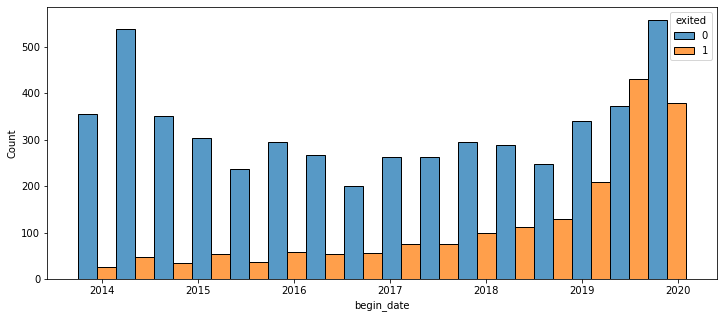

------------------------------------
Столбец: type
exited
0    Month-to-month
1    Month-to-month
Name: type, dtype: object


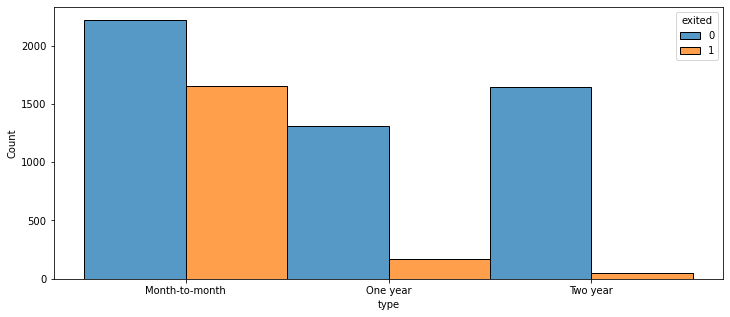

------------------------------------
Столбец: paperless_billing
exited
0    Yes
1    Yes
Name: paperless_billing, dtype: object


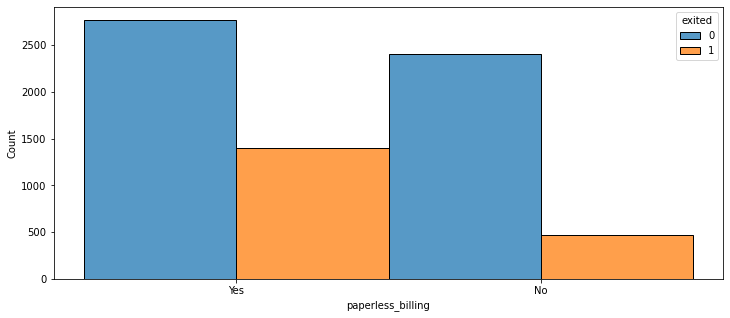

------------------------------------
Столбец: payment_method
exited
0        Mailed check
1    Electronic check
Name: payment_method, dtype: object


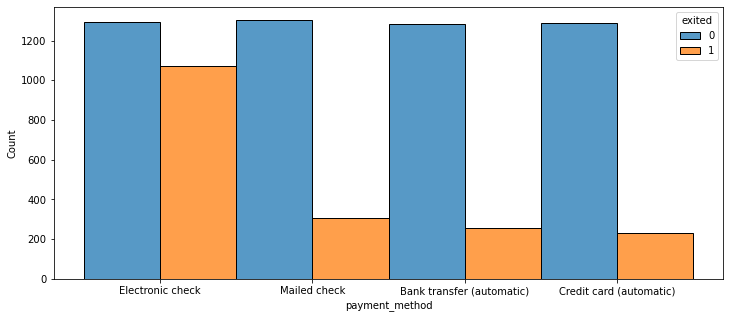

------------------------------------
Столбец: monthly_charges
        median       mean
exited                   
0       64.425  61.265124
1       79.650  74.441332


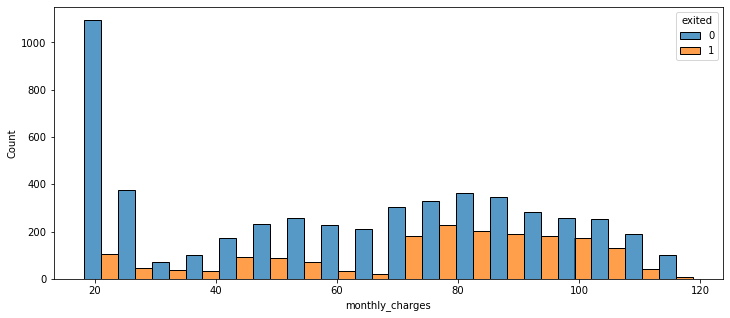

------------------------------------
Столбец: total_charges
          median         mean
exited                       
0       1679.525  2549.999497
1        703.550  1531.796094


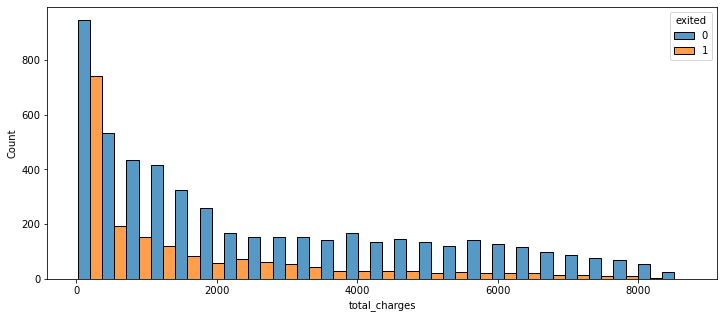

------------------------------------
Столбец: gender
exited
0      Male
1    Female
Name: gender, dtype: object


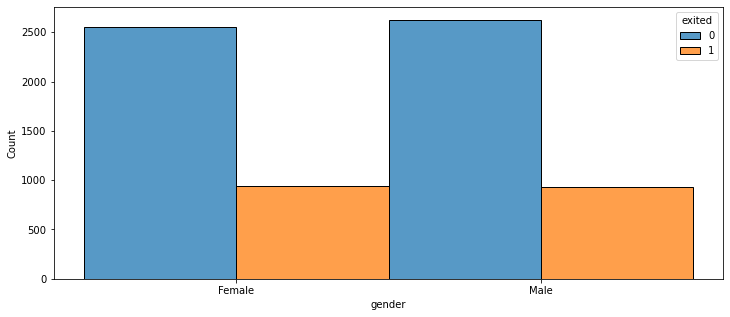

------------------------------------
Столбец: senior_citizen
exited
0    0
1    0
Name: senior_citizen, dtype: int64


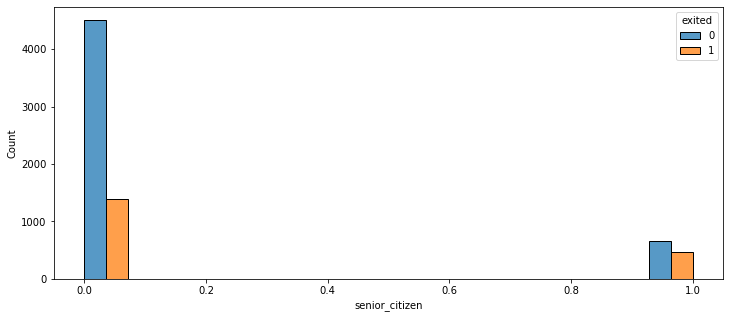

------------------------------------
Столбец: partner
exited
0    Yes
1     No
Name: partner, dtype: object


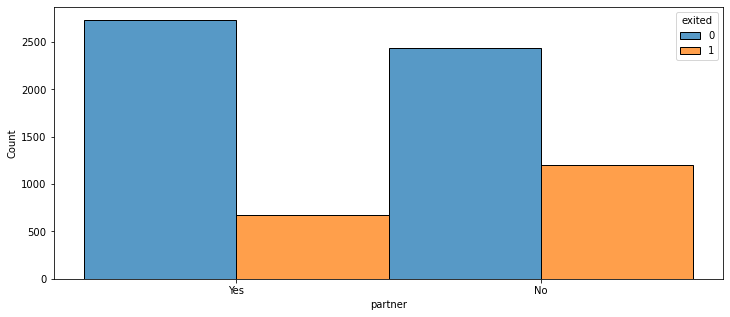

------------------------------------
Столбец: dependents
exited
0    No
1    No
Name: dependents, dtype: object


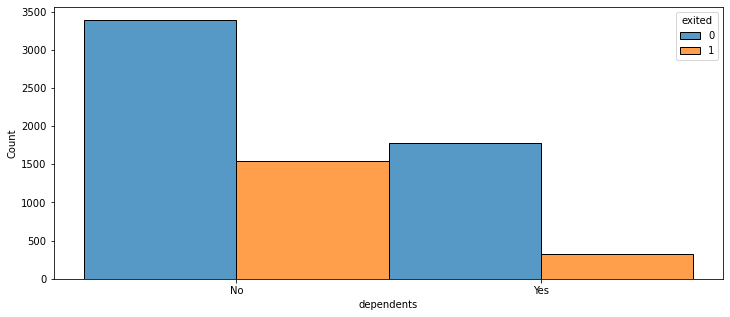

------------------------------------
Столбец: internet_service
exited
0            DSL
1    Fiber optic
Name: internet_service, dtype: object


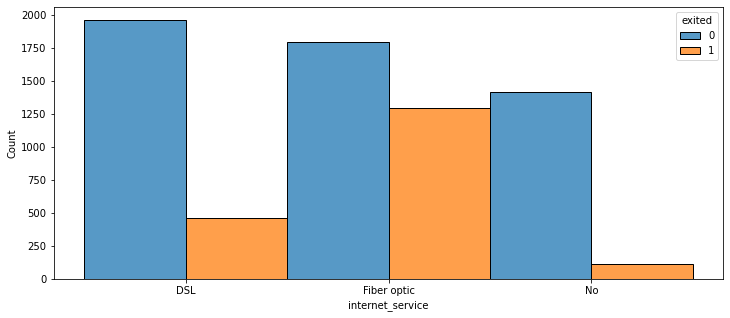

------------------------------------
Столбец: online_security
exited
0    No
1    No
Name: online_security, dtype: object


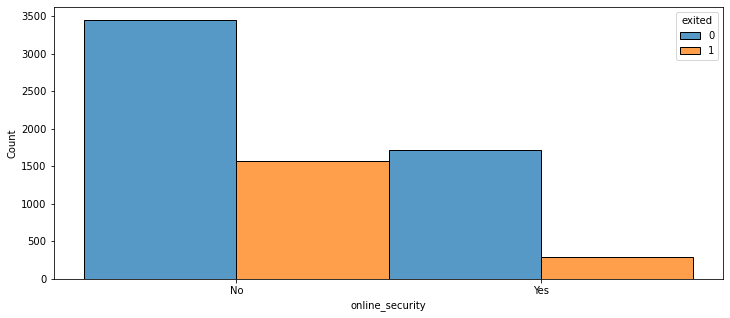

------------------------------------
Столбец: online_backup
exited
0    No
1    No
Name: online_backup, dtype: object


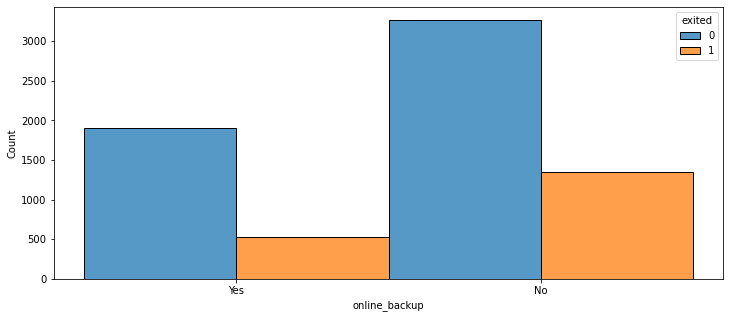

------------------------------------
Столбец: device_protection
exited
0    No
1    No
Name: device_protection, dtype: object


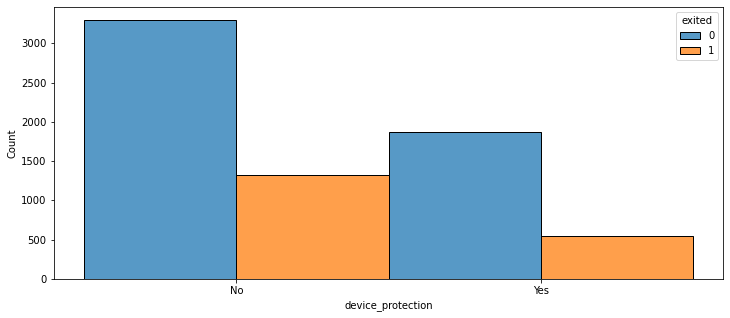

------------------------------------
Столбец: tech_support
exited
0    No
1    No
Name: tech_support, dtype: object


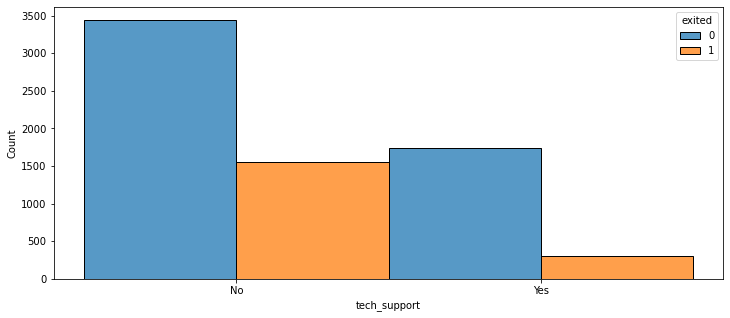

------------------------------------
Столбец: streaming_tv
exited
0    No
1    No
Name: streaming_tv, dtype: object


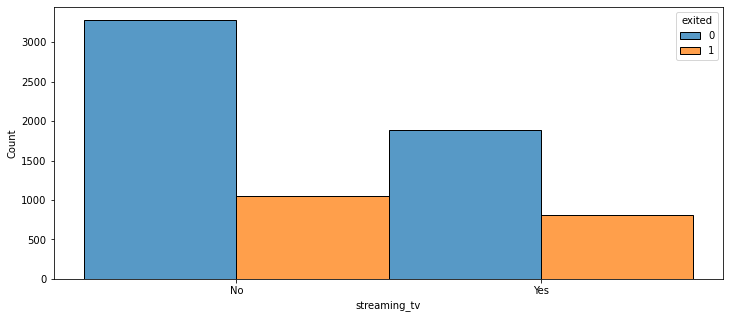

------------------------------------
Столбец: streaming_movies
exited
0    No
1    No
Name: streaming_movies, dtype: object


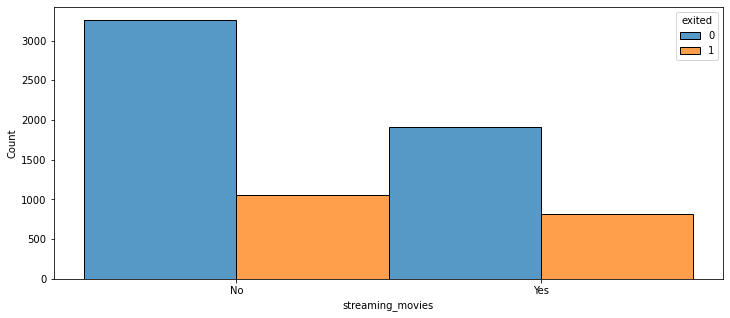

------------------------------------
Столбец: multiple_lines
exited
0     No
1    Yes
Name: multiple_lines, dtype: object


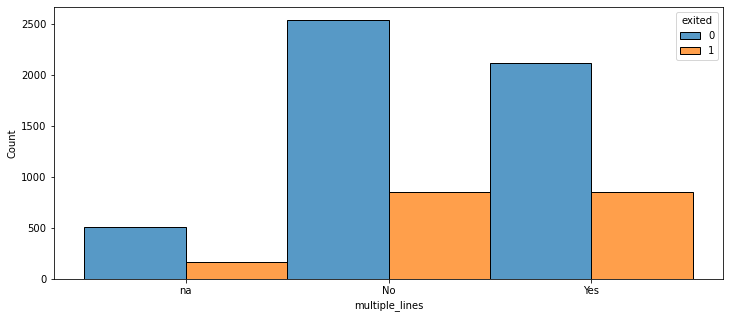

------------------------------------
Столбец: tenure
        median       mean
exited                   
0         38.0  37.569965
1         10.0  17.979133


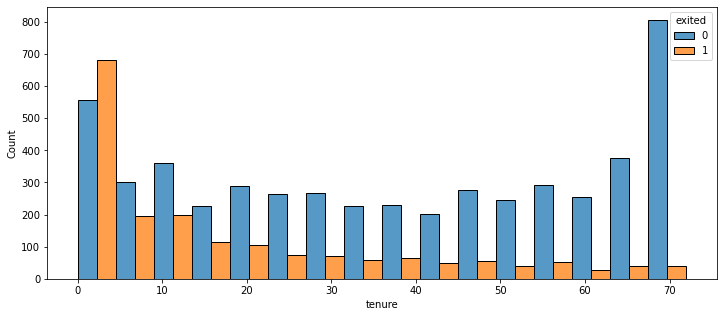

In [33]:
# list of numerical features
num_columns = ['monthly_charges', 
               'total_charges', 
               'tenure']

# list of categorical features
cat_columns = ['type', 
               'paperless_billing',
               'payment_method', 
               'gender',
               'senior_citizen', 
               'partner', 
               'dependents', 
               'internet_service',
               'online_security', 
               'online_backup', 
               'device_protection', 
               'tech_support',
               'streaming_tv', 
               'streaming_movies', 
               'multiple_lines']

# building histogramms and drawing the statistics for each feature

columns = df.columns.drop(['exited', 'customer_id', 'end_date'])
for column in columns:
    plt.figure(figsize=(12,5))
    print('------------------------------------\nСтолбец:', column)
    if column in num_columns:
        print(df.groupby('exited')[column].agg(['median', 'mean']))
    else:
        print(df.groupby('exited')[column].agg(pd.Series.mode))
    sns.histplot(data=df, x=column, hue='exited', multiple='dodge')
    plt.show()

**Chart observations:**

1. The "oldest" customers are the most loyal. The proportion of remaining customers among them far exceeds that of those who have left. This has been the trend for quite some time, until 2019, when the trend reversed sharply. Since 2019, we have seen a significant increase in clients who left, with the share of clients who left exceeding the share of those who stayed at the end of 2019. There was a clear breakdown in business processes: either pricing or tariff policy, or quality of service, or all combined led to a massive churn in the last year.
2. Customers with a monthly payment type are much more likely to leave. While clients with one- and two-year contracts are as loyal as possible and hardly ever leave the company.
3. The remaining clients are indifferent to the method of payment, while those who have left clearly prefer paying by e-cheque.
4. The higher the monthly payment amount, the higher the proportion of clients who leave. Starting from about 70 EUR per month the proportion of clients who leave increases dramatically. The vast majority of the remaining clients have a monthly payment of 20-30 euros.
5. The distribution of the total costs is similar. It should be noted that most of the clients who left are concentrated in the range up to EUR 1,800, as most clients have left the company recently without having accumulated a high amount of total costs.
6. The distribution of those who left and those who stayed is absolutely identical by gender.
7. But among pensioners the proportion of those who leave and those who stay is almost the same, which cannot be said about non-pensioners - the proportion of those who stay is much higher there.
8. Absence of a spouse also has a negative impact on customer loyalty. Singles more easily terminate the contract.
9. The same is true for the presence of dependants. Among those who do not have them, the proportion of clients who quit is significantly higher.
10. A very interesting finding is related to the type of Internet connection. For those connected via fibre, the proportion of customers who leave is almost identical to the proportion of those who stay, which is not the case for those connected via DSL, or those who do not use the internet at all. Perhaps this is the reason for the mass exodus seen in the last six months to a year: either very expensive, or the quality does not meet expectations.
11. As for additional Internet services: the majority of clients do not subscribe to them, both among those who left and those who stayed. However, for those who have Internet security connected, the percentage of those who leave is much lower than for those who do not have this service. The same applies to the availability of tech support. If it is available, customers are less likely to terminate the contract. Among those who have streaming services, the share of abandoned clients is significantly higher than among those who don't have such services. The reasons may lie in the high cost of the service, low download speeds or a narrow catalogue of films.
12. More than half of the clients have left the company within the first 10 months of cooperation. The average period of cooperation for clients who left the company is 18 months, and for clients who stayed - 38 months. And among "young" clients, whose period of cooperation with the company is less than 5 months, the share of those who left the company is greater than the share of those who stayed. We will look at this feature in more detail in the next section of the study. 

### Analysis of the duration of cooperation

In the previous steps, we found that the duration of the cooperation has a strong influence on the fact that the client leaves. Therefore, we will explore this feature in more detail on a boxplot. 

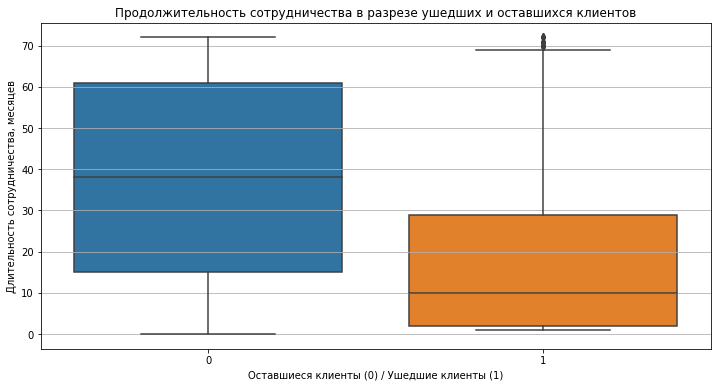

In [34]:
plt.figure(figsize=(12,6))
plt.grid()
sns.boxplot(x=df['exited'], y=df['tenure'])
plt.title('Продолжительность сотрудничества в разрезе ушедших и оставшихся клиентов')
plt.xlabel('Оставшиеся клиенты (0) / Ушедшие клиенты (1)')
plt.ylabel('Длительность сотрудничества, месяцев');

As noted in the previous stage of the study, the median values are very different between leaving and remaining clients - 10 months and 38 months respectively. 75% of all left clients had been with the company for only 29 months, in contrast to the remaining clients, where 75% of clients have been with the company for just over 5 years (approximately 61 months). Among those who left, there is a small tail outside the top "whisker", with more than 70 months of cooperation. Apparently, something serious has happened in the company's business model that even the most loyal are leaving the company.

### Analysis of the amount of monthly payments

The amount of monthly payments also affects the fact that the client is leaving. Will visualise this with a boxplot.

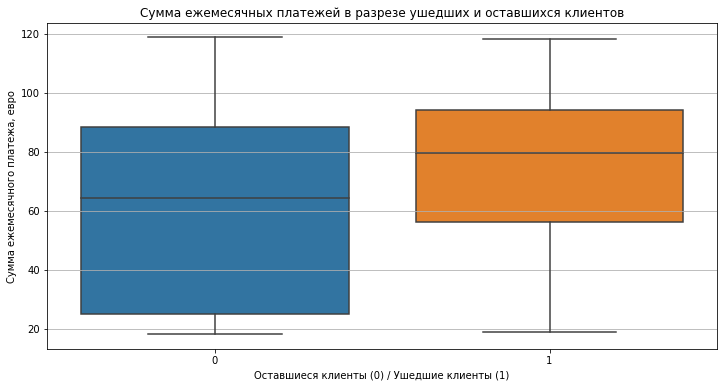

In [35]:
plt.figure(figsize=(12,6))
plt.grid()
sns.boxplot(x=df['exited'], y=df['monthly_charges'])
plt.title('Сумма ежемесячных платежей в разрезе ушедших и оставшихся клиентов')
plt.xlabel('Оставшиеся клиенты (0) / Ушедшие клиенты (1)')
plt.ylabel('Сумма ежемесячного платежа, евро');

The monthly payment of half of the clients who have left is more than 80 euros, while the remaining clients pay 64 euros. Moreover, 25% of the clients remaining in the company pay only less than 24 EUR per month. And in total 50% of the remaining clients (between the 1st and 3rd quartile) pay a monthly fee of about 24 to 88 euros. For those who leave, the same range is much more expensive, between 58 and 95 euros approximately.

### Analysis of the dynamics of attracting new customers

Let's analyse the dynamics of attracting new customers over time.

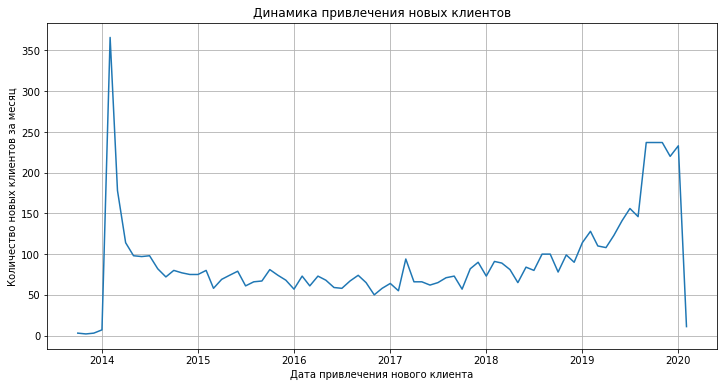

In [36]:
plt.figure(figsize=(12,6))
plt.grid()
sns.lineplot(data=df['begin_date'].value_counts())
plt.title('Динамика привлечения новых клиентов')
plt.xlabel('Дата привлечения нового клиента')
plt.ylabel('Количество новых клиентов за месяц');

As the graph shows, in 2014 the Telecom operator appears to have launched its business activities and may have timed the opening with a number of marketing activities, as evidenced by the maximum peak in customer attraction in February 2014. Then for 5 years, up to 2019, the dynamics of attracting new customers stabilised in the range of 50 to 100 new customers each month. In 2019, the company has apparently decided to be active again in marketing to attract new customers, as there has been a steady growth until October 2019, then the dynamics stabilised again in the range of 230 new customers per month. We do not analyse the data for February 2020, as there are only 11 records for February 01 - the date of data upload.

### Correlation analysis between features

We will analyse the correlation between the features. First, we remove the features that we will not use in further work on the model building. Since we have added the target feature `exited` directly from `end_date`, we will not use this feature; we will also not use the feature `begin_date` since it, in combination with our added feature of duration of cooperation `tenure`, may lead us again to `end_date`. We will also remove the feature `customer_id`. 

In [37]:
df = df.drop(['customer_id', 'begin_date', 'end_date'], axis=1)

Our table contains many categorical features in addition to numerical ones, so the Pearson linear correlation calculation, used for numerical features, is not applicable in this situation. 

In order to carry out correlation analysis for all the features simultaneously, including categorical features, we build a heat map with the calculation of correlation coefficients *фk* using the library *phik*.

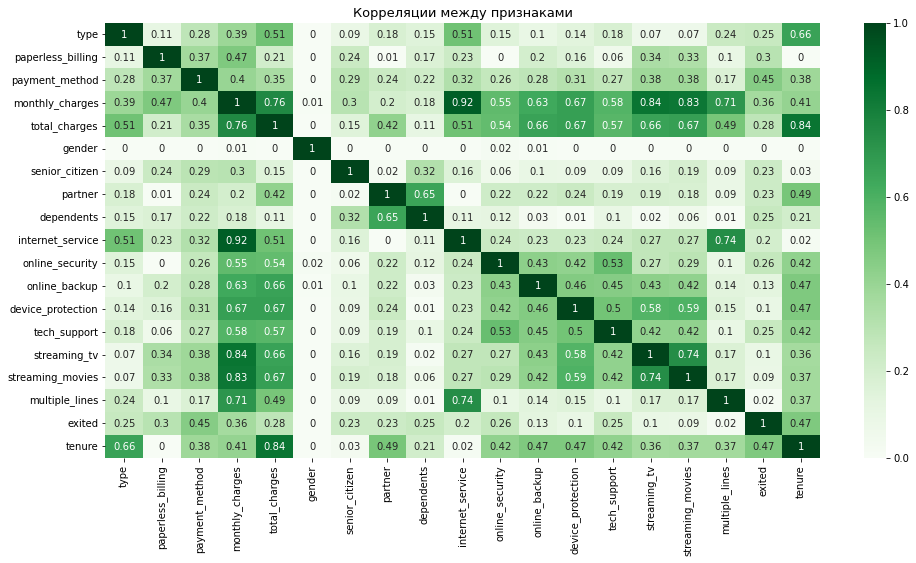

In [38]:
# building the features' correlation matrix
interval_cols = ['monthly_charges',
                 'total_charges',
                 'tenure']

plt.figure(figsize=(16,8))
sns.heatmap(df.phik_matrix(interval_cols=interval_cols).round(2), 
            annot=True,
            cmap='Greens')
plt.title('Корреляции между признаками', fontsize=13);

**Correlation matrix observations:**

1. The target feature has a medium level of correlation with the features of payment method (0.45) and duration of cooperation (0.47). There is also zero correlation with features `gender` (0) and `multiple_lines` (0.02).
2. The feature `monthly_charges` has a very high correlation with the feature type of internet connection (0.92), with the feature `total_charges` (0.76), which is logical - the higher the monthly payment, the higher the total amount. Also, the feature `monthly_charges` has a rather close correlation with all the features of additional Internet services. Obviously, every additional service is directly reflected in the monthly payment.
3. The feature `total_charges` is strongly correlated with the duration of cooperation `tenure` (0.84).
4. `streaming_movies` and `streaming_tv` are strongly correlated (0.74), obviously users connect the streaming services in a bundle.
5. The feature `gender` is not correlated with any of the features at all.

Since it is desirable to remove features that are weakly related to the target, in further work with the model, we will remove the features `gender` and `multiple_lines`. In addition to those that are weakly related to the target, it is also useful to remove those features that are strongly related to each other. In fact, such features have a coherent effect on the model's training (as if they were one combined factor), but the model, when determining the importance of the factors, splits the importance between them. Therefore, we also suggest removing the feature `total_charges`, as it has a relatively high correlation with many features, as well as a high correlation with `tenure` and `monthly_charges`.

In [39]:
df = df.drop(['gender', 'multiple_lines', 'total_charges'], axis=1)

## Data preparation

Let us define the features and the target that we will use in the gradient boosting models (Catboost/LightGBM). Since these models have a built-in categorical data processing mechanism, there is no need to encode categorical features for these models.

We also split the dataset into training and test subsets at a ratio 3:1. When splitting into subsets, we take into account the imbalance of the target feature, so we use the parameter `stratify` to distribute the classes in the target feature proportionally among the subsets. 

**Forming subsets for Gradient Boosting models**

In [41]:
# defining features and target

X = df.drop(['exited'], axis=1)
y = df['exited']

# splitting dataset into train and test subsets at a ration 3:1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=141122)

In [42]:
# checing subsets shape
print('Размер обучающей выборки:', X_train.shape)
print('Размер тестовой выборки:', X_test.shape)

Размер обучающей выборки: (5282, 15)
Размер тестовой выборки: (1761, 15)


When working with the Boosting model (LightGBM/Catboost), which has an internal mechanism for processing categorical features, we did not have to conduct categorical feature coding. However, to work with Logistic Regression and Random Forest it is necessary to carry out preliminary data transformations, namely categorical feature encoding as well as numerical feature scaling for Logistic Regression. Since decision tree algorithms (Random Forest and Boosting models) have a hard time finding dependencies in scaled data, we will not scale numerical features for the Random Forest model.

In order to avoid data leakage into the test sample, both encoding and scaling will be performed after splitting the dataset into training and test samples.

**Forming subsets for Logistic Regression**

For Logistic Regression, we will do categorical features encoding using the One Hot Encoding method.

In [43]:
cat_columns = list(X_train.select_dtypes('object').columns)

enc = OneHotEncoder(sparse=False, drop='first', handle_unknown='ignore')

X_train_ohe = X_train.copy()
X_test_ohe = X_test.copy()

X_train_ohe = enc.fit_transform(X_train[cat_columns])
X_train_ohe = pd.DataFrame(X_train_ohe, index=X_train.index, columns=enc.get_feature_names_out())
X_train_ohe = pd.concat([X_train, X_train_ohe], axis=1).drop(cat_columns, axis=1)

X_test_ohe = enc.transform(X_test[cat_columns])
X_test_ohe = pd.DataFrame(X_test_ohe, index=X_test.index, columns=enc.get_feature_names_out())
X_test_ohe = pd.concat([X_test, X_test_ohe], axis=1).drop(cat_columns, axis=1)

In [44]:
X_train_ohe.head()

,monthly_charges,tenure,type_One year,type_Two year,paperless_billing_Yes,payment_method_Credit card (automatic),payment_method_Electronic check,payment_method_Mailed check,senior_citizen_1,partner_Yes,dependents_Yes,internet_service_Fiber optic,internet_service_No,online_security_Yes,online_backup_Yes,device_protection_Yes,tech_support_Yes,streaming_tv_Yes,streaming_movies_Yes
5685,19.20,45.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1641,87.10,72.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
968,77.35,71.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0
2666,79.50,66.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
252,40.20,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [45]:
# checking subsets shape
print('Размер обучающей выборки:', X_train_ohe.shape)
print('Размер тестовой выборки:', X_test_ohe.shape)

Размер обучающей выборки: (5282, 19)
Размер тестовой выборки: (1761, 19)


*Numerical features scaling*.

The numerical attributes in the dataset differ in value, unit and range. Since the linear model algorithm can assume differences in values as an element of importance and priority of one feature over another, it is necessary to scale numerical features for Logistic Regression.

In [46]:
# defining a list of numeric features

numeric = ['monthly_charges', 'tenure']

# scaling subsets

scaler = StandardScaler()
scaler.fit(X_train_ohe[numeric])
X_train_ohe[numeric] = scaler.transform(X_train_ohe[numeric])
X_test_ohe[numeric] = scaler.transform(X_test_ohe[numeric])

In [47]:
X_train_ohe.head()

,monthly_charges,tenure,type_One year,type_Two year,paperless_billing_Yes,payment_method_Credit card (automatic),payment_method_Electronic check,payment_method_Mailed check,senior_citizen_1,partner_Yes,dependents_Yes,internet_service_Fiber optic,internet_service_No,online_security_Yes,online_backup_Yes,device_protection_Yes,tech_support_Yes,streaming_tv_Yes,streaming_movies_Yes
5685,-1.515856,0.519778,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1641,0.743901,1.620132,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
968,0.419415,1.579378,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0
2666,0.490968,1.375609,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
252,-0.816962,-1.273392,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


**Forming subsets for Random Forest**

OHE is not suitable for the Random Forest model, it does not work well with it. Let's perform categorical features encoding with OE - OrdinalEncoder method.

In [48]:
# encoding categorical features using OrdinalEncoder method

encoder = OrdinalEncoder()

X_train_oe = X_train.copy()
X_test_oe = X_test.copy()

X_train_oe[cat_columns] = encoder.fit_transform(X_train_oe[cat_columns])
X_test_oe[cat_columns] = encoder.transform(X_test_oe[cat_columns])

In [49]:
X_train_oe.head()

,type,paperless_billing,payment_method,monthly_charges,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,tenure
5685,2.0,0.0,2.0,19.20,0.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0
1641,2.0,1.0,0.0,87.10,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,72.0
968,2.0,0.0,1.0,77.35,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,71.0
2666,2.0,1.0,1.0,79.50,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,66.0
252,0.0,0.0,2.0,40.20,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [50]:
# checing subsets shape
print('Размер обучающей выборки:', X_train_oe.shape)
print('Размер тестовой выборки:', X_test_oe.shape)

Размер обучающей выборки: (5282, 15)
Размер тестовой выборки: (1761, 15)


**Conclusions**.

The following steps were carried out in preparation of the data for model building:

- Samples for the boosting models were generated; the original data was split into training and test samples in the proportion of 75:25. The training and test samples for the boosting models are as follows: `X_train` and `X_test`;
- for Logistic Regression, categorical variables were encoded using the OHE method, and numerical features were scaled. The training and test samples for Logistic Regression are as follows: `X_train_ohe` and `X_test_ohe`;
- for the Random Forest model, categorical variables were encoded using the OrdinalEncoder method. The training and test samples for the Random Forest model are as follows: `X_train_oe` and `X_test_oe`.

## Models training

We will train several models with the following algorithms: Logistic Regression, Random Forest, Catboost Gradient Boosting and LightGBM Gradient Boosting.

For each of the models, we will select the optimal hyperparameters using the GridSearchCV tool, which implements cross-validation. Also, at the preprocessing stage, we have found that our target feature is not balanced - the ratio of negative to positive class was 0.73:0.27. So, let's apply the hyperparameter `class_weight='balanced'`. We will evaluate the quality of the models using the metric `ROC-AUC`. The model with the highest metric will be tested on the test sample.

### Logistic Regression

In [51]:
%%time

# dictionary with hyperparameters to select

param_grid = [
    {'penalty': ['l1', 'l2'], 'solver': ['newton-cg', 'lbfgs', 'liblinear'], 'C': [0.01, 0.1, 0.5, 1, 3, 5, 7, 10, 100]},
 ]


# hyperparameters selection and model training 

lr = GridSearchCV(estimator=LogisticRegression(random_state=141122, class_weight='balanced'), 
                  param_grid=param_grid, 
                  cv=5,
                  scoring='roc_auc',
                  verbose=1,
                  n_jobs = -1)

lr.fit(X_train_ohe, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Wall time: 2.71 s


GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          random_state=141122),
             n_jobs=-1,
             param_grid=[{'C': [0.01, 0.1, 0.5, 1, 3, 5, 7, 10, 100],
                          'penalty': ['l1', 'l2'],
                          'solver': ['newton-cg', 'lbfgs', 'liblinear']}],
             scoring='roc_auc', verbose=1)

In [52]:
print('Значение ROC-AUC: Логистическая Регрессия =', lr.best_score_.round(3))

Значение ROC-AUC: Логистическая Регрессия = 0.841


In [53]:
lr.best_params_

{'C': 0.5, 'penalty': 'l1', 'solver': 'liblinear'}

The best value of the `ROC-AUC` metric (0.841) was obtained by the model with regularisation parameter equal to 0.5, regularisation algorithm l1 and optimisation algorithm 'liblinear'.

### Random Forest Classifier

In [54]:
%%time

# dictionary with hyperparameters to select

param_grid = { 
   'n_estimators': [50, 100, 200, 300, 500],
   'max_depth': range(2, 11),
   'min_samples_leaf': range (1,8)
}

# hyperparameters selection and model training 

rf = GridSearchCV(estimator=RandomForestClassifier(random_state=141122, class_weight='balanced'), 
                  param_grid=param_grid, 
                  cv=5,
                  scoring='roc_auc', 
                  verbose=1,
                  n_jobs=-1)

rf.fit(X_train_oe, y_train)

Fitting 5 folds for each of 315 candidates, totalling 1575 fits
Wall time: 6min 49s


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=141122),
             n_jobs=-1,
             param_grid={'max_depth': range(2, 11),
                         'min_samples_leaf': range(1, 8),
                         'n_estimators': [50, 100, 200, 300, 500]},
             scoring='roc_auc', verbose=1)

In [55]:
print('Значение ROC-AUC: Случайный Лес =', rf.best_score_.round(3))

Значение ROC-AUC: Случайный Лес = 0.845


In [56]:
rf.best_params_

{'max_depth': 8, 'min_samples_leaf': 7, 'n_estimators': 100}

The value of ROC-AUC metric improved slightly compared to Logistic Regression (0.845). Optimal hyperparameters of the model: maximum depth 8, minimum number of objects in the leaf 7, number of trees in the forest 100.

### Catboost

Catboost, like LightGBM, has an internal mechanism for handling categorical variables. To work it out, just change the data type of columns with categorical variables to the corresponding one - `'category'`.

In [57]:
X_train[cat_columns] = X_train[cat_columns].astype('category')
X_test[cat_columns] = X_test[cat_columns].astype('category')

In [58]:
%%time

# dictionary with hyperparameters to select

param_grid = {
    'iterations': [100, 200, 300],
    'depth': range(2, 6),
    'learning_rate': [0.025, 0.05, 0.1, 0.3]
}

# hyperparameters selection and model training 

cb = GridSearchCV(estimator=CatBoostClassifier(random_state=141122, 
                                               cat_features=cat_columns,
                                               class_weights=[1, 2.77],
                                               verbose=False), 
                  param_grid=param_grid, 
                  cv=5,
                  scoring='roc_auc', 
                  refit='AUC',
                  n_jobs=-1)

cb.fit(X_train, y_train)

Wall time: 7min 32s


GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x0000017384B4ACA0>,
             n_jobs=-1,
             param_grid={'depth': range(2, 6), 'iterations': [100, 200, 300],
                         'learning_rate': [0.025, 0.05, 0.1, 0.3]},
             refit='AUC', scoring='roc_auc')

In [59]:
print('Значение ROC-AUC: Catboost =', cb.best_score_.round(3))

Значение ROC-AUC: Catboost = 0.848


In [60]:
cb.best_params_

{'depth': 4, 'iterations': 200, 'learning_rate': 0.05}

The value of the ROC-AUC metric improved slightly = 0.848. Optimal model hyperparameters: maximum depth - 4, number of iterations - 200, learning rate - 0.05.

### LightGBM

In [61]:
%%time

# dictionary with hyperparameters to select

param_grid = {
    'n_estimators': [200, 400, 600],
    'max_depth': range(1, 4),
    'num_leaves' : [10, 50, 100, 200],
    'learning_rate': [0.05, 0.1, 0.3]
}

# hyperparameters selection and model training 

lgb = GridSearchCV(estimator=LGBMClassifier(random_state=141122, class_weight='balanced'), 
                  param_grid=param_grid, 
                  cv=5,
                  scoring='roc_auc',
                  refit=True,
                  n_jobs=-1)

lgb.fit(X_train, y_train, categorical_feature=cat_columns)

Wall time: 52.7 s


GridSearchCV(cv=5,
             estimator=LGBMClassifier(class_weight='balanced',
                                      random_state=141122),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.3],
                         'max_depth': range(1, 4),
                         'n_estimators': [200, 400, 600],
                         'num_leaves': [10, 50, 100, 200]},
             scoring='roc_auc')

In [62]:
print('Значение ROC-AUC: LightGBM =', lgb.best_score_.round(3))

Значение ROC-AUC: LightGBM = 0.847


In [63]:
lgb.best_params_

{'learning_rate': 0.05, 'max_depth': 1, 'n_estimators': 600, 'num_leaves': 10}

ROC-AUC metric value = 0.847. Optimal model hyperparameters: maximum depth - 1, number of estimators - 600, learning rate - 0.05, number of leaves - 10.

**Conclusion:**

Four different models were trained: logistic regression, random forest, Catboost and gradient boosting LightGBM.

For each model optimal hyperparameters were selected and ROC-AUC metrics were estimated.

The Catboost model showed the best results. The ROC-AUC metric for it was 0.848. Next, we test this model with its optimal hyperparameters on the test sample.

## Model testing

Let's test the quality of the chosen model on a test sample.

In [64]:
%%time

# training model with best hyperparameters

cb_test = CatBoostClassifier(random_state=141122, 
                              cat_features=cat_columns,
                              class_weights=[1, 2.77],
                              depth=4,
                              learning_rate=0.05,                        
                              iterations=200,
                              verbose=False)

cb_test.fit(X_train, y_train) 

Wall time: 8.04 s


We will calculate the ROC-AUC for it and plot the ROC curve.

Значение ROC-AUC на тестовой выборке: 0.8515


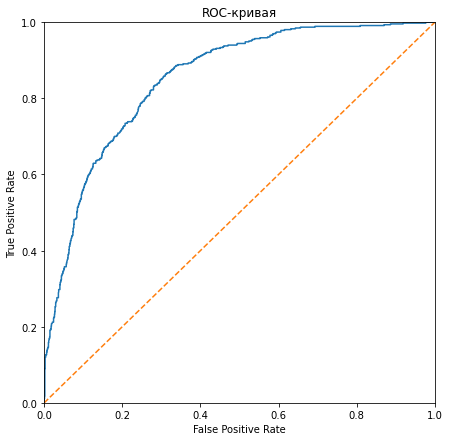

In [65]:
# calculating probabilities
probabilities_test = cb_test.predict_proba(X_test)
probabilities_one_test = probabilities_test[:,1]

# ROC-curve of our model 
plt.figure(figsize=(7,7))
fpr, tpr, thresholds = roc_curve(y_test, probabilities_one_test) 
plt.plot(fpr, tpr)

# ROC-curve of random model 
plt.plot([0, 1], [0, 1], linestyle='--')

# axes and captions
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая');

# printing the AUC-ROC value
print('Значение ROC-AUC на тестовой выборке:', roc_auc_score(y_test, probabilities_one_test).round(4))

The test sample was able to obtain a ROC-AUC value slightly higher than the cross-validation during training. ROC-AUC = 0.8515.

**The final value of the ROC-AUC metric on the test sample corresponds to the target metric value to be achieved to solve the problem (>=0.85). Our model is adequate, showing a metric value clearly above the ROC-AUC=0.5 value of the random constant model**. 

Will calculate the accuracy, F1 and plot the heat map of the confusion matrix.

              precision    recall  f1-score   support

           0       0.91      0.74      0.82      1294
           1       0.53      0.80      0.64       467

    accuracy                           0.76      1761
   macro avg       0.72      0.77      0.73      1761
weighted avg       0.81      0.76      0.77      1761



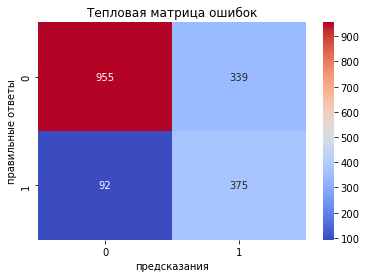

In [66]:
print(classification_report(y_test, cb_test.predict(X_test)))
sns.heatmap(confusion_matrix(y_test, cb_test.predict(X_test)).round(), annot=True, fmt='.0f', cmap = 'coolwarm')
plt.title('Тепловая матрица ошибок')
plt.xlabel('предсказания')
plt.ylabel('правильные ответы');

The percentage of correct answers (Accuracy) was 76%. F1-score value = 0.64.

The model correctly predicts customer leaving in 375 out of 467 cases (recall=0.80), 92 times it is wrong. The model correctly predicts that the client will stay with the company in 955 cases out of 1294, it was wrong 339 times. 

Let's visualise the most important features from the point of view of the model algorithm that have the greatest impact on the predictive decision.

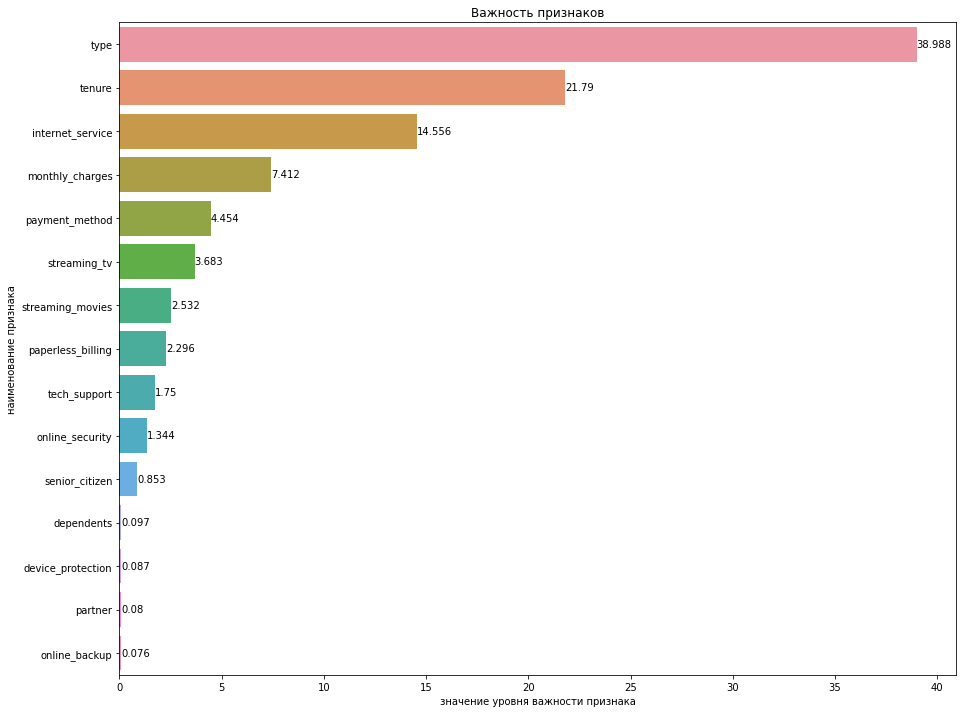

In [67]:
# creating the table with features importances
feature_importance = (
    pd.Series(cb_test.feature_importances_.round(3), X_test.columns)
    .sort_values(ascending=False)
)

# plotting a graph
plt.figure(figsize=(15,12))
ax = sns.barplot(y=feature_importance.index, x=feature_importance)
for i in ax.containers:
    ax.bar_label(i,)
plt.title('Важность признаков')
plt.xlabel('значение уровня важности признака')
plt.ylabel('наименование признака');

As the graph shows, the most important features from the point of view of the model algorithm that influence the predictive decision are the type of contract (monthly payment, annual or two-year contract), the duration of the customer's relationship with the company, and the type of internet connection (fibre optic cable or DSL).

The least important features are the availability of cloud file storage, family status, the availability of antivirus, and the presence of dependents.

## Overall conclusion

The following key steps were carried out during the project:

1. Research and preprocessing of data:
    - downloaded and reviewed the data,
    - merged all the tables into a single data frame on the `cusotmer_id` column,
    - corrected the style of the column names according to the "snake_register",
    - converted the data type to match the logic and nature of the data represented therein,
    - filled in the missing values created after merging the tables, as well as the implicit missing values in the `end_date` and `total_charges` columns,
    - we added the target attribute `exited`, which reflects the status of the client (left/stayed), as well as an additional feature `tenure` - the duration of the client's cooperation with the company, measured in months.
    

2. Exploratory analysis of the data revealed the following key discoveries, important from the point of view of possible changes in the business model and management decision-making:
    - The "oldest" customers are the most loyal. The share of remaining customers among them far exceeds the share of those who have left. Since 2019, we have seen a significant increase in quitting customers, and at the end of 2019, the share of quitting customers exceeded the share of remaining customers. There has been a clear breakdown in business processes: either pricing or tariff policy, or quality of service, or all combined to cause massive churn in the last year.
    - clients with a monthly payment type are much more likely to leave. While clients with one- and two-year contracts are as loyal as possible and hardly ever leave the company.
    - The higher the monthly payment amount, the higher the share of clients who leave the company. And, starting from about 70 euros a month, the percentage of quitting clients increases sharply. The vast majority of the remaining clients have a monthly payment of 20-30 euros.
    - A very interesting finding has to do with the type of Internet connection. For those connected via fibre, the proportion of customers who leave is almost comparable to the proportion of remaining customers, which cannot be said about customers connected via DSL or those who do not use the internet at all. This may be the reason for the mass exodus seen in the last six months to a year: either very expensive, or the quality does not meet expectations.
    - More than half of the clients left the company within the first 10 months of cooperation. The average term of cooperation for clients who have left the company is 18 months, and 38 months for clients who stayed. Moreover, the share of "young" clients whose term of cooperation with the company is less than 5 months exceeds the share of those who stayed.
    - The correlation analysis of the features showed an average level of correlation of the target feature with the features of the payment method (0,45) and the duration of cooperation (0,47).


3. Preparing the data for the machine learning model. In this step, the following steps were performed:
    - Samples for the boosting models (LightGBM/Catboost) were generated, the original data were split into training and test samples in the proportion of 75:25,
    - For Logistic Regression, categorical variables were encoded by OHE, and numerical features were scaled,
    - For the Random Forest model, categorical variables were encoded using the OrdinalEncoder method.
    

4. Model training:
    - 4 different models were trained: logistic regression, Random Forest, gradient boosting from Catboost library and LightGBM gradient boosting,
    - For each model, optimal hyperparameters were chosen and ROC-AUC metrics were estimated.
    - The Catboost model showed the best results. The ROC-AUC metric for it was 0.848. It was tested at the stage of model testing.
    

5. Testing of the selected model:
    - We tested the gradient boosting model from Catboost library, which showed the best quality metric in the training phase,
    - The final value of ROC-AUC metric on the test sample is 0.8515, which satisfies the target metric value (>=0.85) for our problem,
    - We calculated a share of correct answers Accuracy=76% and F1-score=0.64,
    - We built an confusion matrix. The model correctly predicts customer leaving in 375 cases out of 467 (recall=0.80), 92 times it is wrong.
    - Visualized a plot of the importance of the features. The most important features from the point of view of the model algorithm that influence the predictive decision are the type of contract (monthly payment, one-year or two-year contract) and the duration of the client's cooperation with the company.

## Project Report

In the course of the project, we stuck almost entirely to the original project plan. The only deviations from the plan were in the selection of better tools for certain tasks. In particular:
- The calculation of correlations from the *phik* library was used for the correlation analysis, which allowed the calculation of correlations of both numerical and categorical features at the same time. The original plan was to calculate Pearson correlations, which are not relevant for categorical features,


- The One Hot Encoding (OHE) mechanism was used to encode categorical features for Logistic Regression and the OrdinalEncoder (OE) mechanism was used to encode categorical features for Random Forest. The original plan was to use `pd.get_dummies` for both models.  

<u>**Accordingly, following the plan developed, the following key steps were implemented during the project:**</u>

1. Study and preprocessing of data:

    - downloaded and reviewed the data,
    - merged all the tables into a single data frame using the `cusotmer_id` column,
    - corrected the style of the column names according to the "snake_register",
    - converted the data type according to the logic and nature of the data represented therein, namely the `begin_date`, `end_date` columns converted to `datetime` data type and the `total_charges` column to `float`,
    - processed the missing values: 
    - the missing values generated after merging the tables indicated that the client did not have the service in question. Accordingly, these missing values were filled with 'No',
    - missing values in the `end_date` column were not missing values, but the fact that they are actual clients, i.e., that the contract was not terminated before the date of data uploading. Subsequently, when preparing the data for the ML model, we calculated an additional feature - duration of cooperation. Accordingly, to calculate it, it was logical to fill in the missing values in the `end_date` column with the date of data uploading,
    - also, the implicit missing entries in the `total_charges` column, when examined in detail, turned out to be only in the observations for the month of upload (2020-02-01). It was assumed that, for these clients, the monthly expenditure data for January had not been updated in the total expenditure. Consequently, it was decided to fill these missing data with the monthly expenditures of these clients in January,
    - we added the target attribute `exited` to show the client's status (left/stayed) and also added an additional feature `tenure` - the duration of the client's cooperation with the company, measured in months.
    

2. Exploratory data analysis has revealed the following key discoveries that are important from the perspective of factor analysis of activity, in order to make managerial decisions to optimise the business model and business processes:

    - The "oldest" customers are the most loyal. The share of remaining customers among them far exceeds the share of those who have left. Since 2019, we have seen a significant increase in clients who left, with the share of clients who left exceeding the share of those who stayed at the end of 2019. There was a clear breakdown in business processes: either pricing or tariff policy, or quality of service, or all combined, led to a mass exodus of clients in the last year,
    - clients with a monthly payment type are far more likely to leave, while clients with one- and two-year contracts are the most loyal and almost never leave the company,
    - the higher the monthly payment, the higher the share of quitting clients. And, starting from about 70 euros a month, the proportion of clients leaving the company increases sharply. The vast majority of clients who stay with the company pay a monthly fee of 20-30 euros,
    - a very interesting finding has to do with the type of internet connection. For those connected via fibre optic cable the proportion of customers who leave is almost comparable to the proportion of those who stay, which cannot be said about customers connected via DSL, or customers who do not use the internet at all. This may be the reason for the mass exodus seen in the last six months to a year: either fibre optic connections are very expensive, or the quality of the connection does not meet expectations,
    - more than half of the clients left the company within the first 10 months of cooperation. The average duration of cooperation for those who left the company is 18 months, while for the remaining clients it is 38 months. Moreover, the proportion of "young" clients who have been with the company for less than 5 months is higher than the proportion of those who stayed,
    - The correlation analysis of the features showed an average level of correlation of the target feature with the features of the payment method (0.45) and the duration of cooperation (0.47).


3. Preparing the data for the machine learning model. In this step, the following steps were carried out:

    - Conducted a correlation analysis of the features:
    - We preliminarily removed the features that we did not plan to use in further work on the model development. Since we had added the target attribute `exited` directly from `end_date`, we couldn't use this feature; we also couldn't use the feature `begin_date` because it, in combination with our added feature of cooperation duration `tenure`, could lead us back to `end_date`. Well, we also removed the feature `customer_id`,
    - Since it is desirable to remove attributes weakly related to the target, we removed attributes `gender` and `multiple_lines` (they have zero correlation with the target). In addition to those that are weakly related to the target, it is useful to remove features that are strongly related to each other. Therefore, we decided to also remove the feature `total_charges`, as it has a relatively high correlation with many features, and a high correlation with `tenure` and `monthly_charges`.
    - Formed samples for the Boosting models (LightGBM/Catboost), split the source data into training and test samples in the proportion 75:25,
    - generated samples for Logistic Regression. We encoded categorical variables for them using the `OHE` method, and scaled numerical features using the `StandardScaler` method,
    - generated samples for the Random Forest model. Categorical variables were encoded by `OrdinalEncoder` method for them,
    - The imbalance of target feature classes was investigated (negative to positive class ratio = 0.73:0.27). This aspect was taken into account as a hyperparameter in model development.
    

4. Model training:

    - 4 different models were trained: logistic regression, random forest, Catboost gradient boosting and LightGBM gradient boosting,
    - For each model, optimal hyperparameters were chosen and ROC-AUC metrics were estimated.
    - The Catboost model showed the best results. The ROC-AUC metric for it was 0.848. We used it for the next stage of testing.
    

5. Testing of the selected model:

    - We tested the gradient boosting model from the Catboost library, which showed the best quality metric in the training phase,
    > The hyperparameters of the best model we took in testing are as follows: 
        >- `random_state=141122, depth=4, iterations=200, learning_rate=0.05, class_weights=[1, 2.77]`
        
    - The final value of ROC-AUC metric on the test sample is 0.8515, which satisfies the target metric threshold (>=0.85) to solve our problem,
    - We calculated a share of correct answers Accuracy=76% and F1-score=0.64,
    - We built a confusion matrix. The model correctly predicts customer leaving in 375 cases out of 467 (recall=0.80), in 92 cases the model is wrong,
    - We visualized a graph of the importance of the features. The most important attributes from the point of view of the model algorithm that influence the predictive decision are the type of contract (monthly payment, one year or two years contract), the duration of the client's cooperation with the company, and the type of internet connection (fiber optic cable or DSL). The least important features are the availability of cloud file storage, family status, the availability of anti-virus and the presence of dependents.
    
---
**Key factor in achieving the target metric**

In our view, the key factor in achieving the target metric value, in addition to the right preprocessing of the data and use of the right categorical encoding tool, was the addition of a new feature `tenure' - the duration of the customer relationship with the company, which increased the value of the target metric.


---
**Difficulties encountered during project implementation**.
1. During the course of the project it was difficult to identify the set of additional features that would be desirable to introduce in order to improve the quality of the model. We were considering three additional features: 1. Lifespan of the customer, 2. Type of contracted service (Internet, telephony or both), and 3. Number of additionally connected services.** As a result we decided to add only the first feature - the duration of customer's co-operation with the company. 


2. In addition to introducing new features, the question was about the optimization of the set of features used for training models - which features to retain, and which can be safely excluded when working with models. A correlation analysis was conducted to determine the multicollinearity of the features. Based on the results of the analysis, we excluded from further work on the training of models the features weakly related to the target (`gender` and `multiple_lines`), as well as the features strongly related to each other (we excluded `total_charges`, as it has a relatively high correlation with many features, as well as a high correlation with `tenure` and `monthly_charges`).


3. It was difficult to decide on optimal hyperparameters for the models, especially the resource-intensive ones (Catboost). Knowing that in order to demonstrate good metric results this model prefers large number of iterations and large tree depths, the initial approach in GridSearchCV included high values for these hyperparameters, due to which we had to wait a long time for the model training result. Accordingly, in order to optimise and balance both the quality of the model and its training time, the values of the `depth` and `iterations` hyperparameters were experimentally reduced to acceptable values, both in terms of the resulting metric and the training time.